<a href="https://colab.research.google.com/github/Shubhamraut2128/Parking_Slot_Detection/blob/main/parking_plot_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Oct 20 15:23:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 72.6 MB/s eta 0:00:00


In [ ]:
import cv2
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kPrqeOGvChn2NR1zkARB")
project = rf.workspace("shubham-k8wkg").project("car-parking-space-detection-jndrr-ajy9j")
version = project.version(1)
dataset = version.download("yolov11")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 136.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Car-parking-space-detection-1 in yolov11:: 100%|██████████| 3854/3854 [00:00<00:00, 5373.61it/s]


In [ ]:
dataset_path = "/content/Parking-Detection-1"


In [ ]:
dataset_path = "/content/Car-parking-space-detection-1"
splits = ["train", "valid", "test"]

In [ ]:
def load_yolo_labels(label_path, img_width, img_height):
    boxes = []
    with open(label_path, "r") as f:
        for line in f.readlines():
            parts = line.strip().split()
            if len(parts) != 5:
                print(f"Skipping invalid label line: {line.strip()}")
                continue
            cls, x_center, y_center, w, h = map(float, parts)
            x_center, y_center, w, h = (
                x_center * img_width,
                y_center * img_height,
                w * img_width,
                h * img_height,
            )
            x1 = int(x_center - w / 2)
            y1 = int(y_center - h / 2)
            x2 = int(x_center + w / 2)
            y2 = int(y_center + h / 2)
            boxes.append((int(cls), x1, y1, x2, y2))
    return boxes


===== TRAIN SAMPLES =====


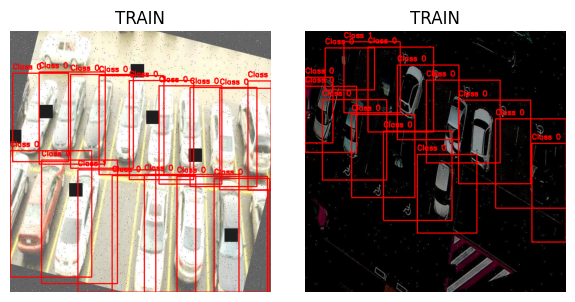

===== VALID SAMPLES =====


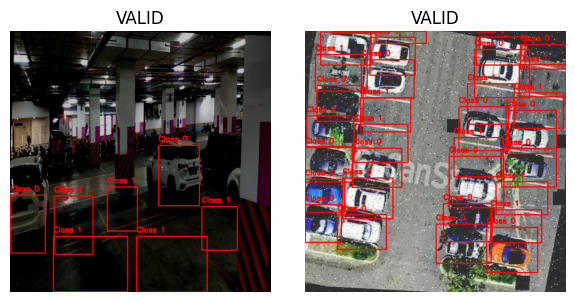

===== TEST SAMPLES =====


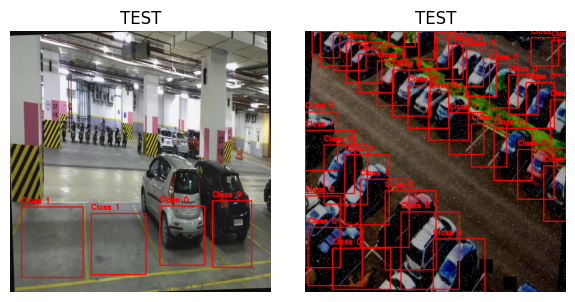

In [ ]:
def visualize_samples(split="train", n=2, cols=3):
    img_dir = os.path.join(dataset_path, split, "images")
    lbl_dir = os.path.join(dataset_path, split, "labels")

    image_files = os.listdir(img_dir)
    sample_images = random.sample(image_files, min(n, len(image_files)))

    rows = (len(sample_images) + cols - 1) // cols
    plt.figure(figsize=(cols * 3, rows * 3))

    for idx, img_file in enumerate(sample_images, 1):
        img_path = os.path.join(img_dir, img_file)
        label_path = os.path.join(lbl_dir, img_file.replace(".jpg", ".txt"))

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        h, w, _ = img.shape
        boxes = load_yolo_labels(label_path, w, h)

        for cls, x1, y1, x2, y2 in boxes:
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(img, f"Class {cls}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

        plt.subplot(rows, cols, idx)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{split.upper()}")

    plt.tight_layout()
    plt.show()


for split in splits:
    print(f"===== {split.upper()} SAMPLES =====")
    visualize_samples(split, n=2, cols=3)


In [ ]:
model = YOLO('yolov8n.pt')
model.train(data='/content/Car-parking-space-detection-1/data.yaml', epochs=20 , batch = 16)

Ultralytics 8.3.218 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Car-parking-space-detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f88db5806b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
from google.colab import files

# This will open a file chooser in Colab
uploaded = files.upload()

Saving parking.mp4 to parking.mp4


In [ ]:
!ffmpeg -y -i /content/parking.mp4 -vcodec libx264 -acodec mp3 /content/parking.avi


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [1]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('/content/parking.avi','rb').read()
data_url = "data:video/avi;base64," + b64encode(mp4).decode()
HTML(f"<video width=640 controls><source src='{data_url}' type='video/avi'></video>")



FileNotFoundError: [Errno 2] No such file or directory: '/content/parking.avi'